In [41]:
from pathlib import Path
from sys import prefix

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
PROCESSED_DATA = Path("../data/processed/")
FIGURES_DATA = Path("../reports/figures/")
INTERIM_DATA = Path("../data/interim/")

In [43]:
transactions = pd.read_parquet(PROCESSED_DATA / "transactions.parquet")
users = pd.read_parquet(PROCESSED_DATA / "users.parquet")
merchants = pd.read_parquet(PROCESSED_DATA / "merchants.parquet")

In [44]:
users['signup_date'] = pd.to_datetime(users['signup_date'])

In [45]:
transactions.head()

,transaction_id,timestamp,user_id,merchant_id,amount,channel,currency,device,location,payment_method,is_international,session_length_seconds,is_first_time_merchant,is_fraud
0,TX000000,2022-06-17 23:28:00,U14804,M0314,130.03,in-store,EUR,Android,"{'lat': 40.057938, 'long': 14.959737}",debit_card,1,145,0,0
1,TX000001,2022-01-04 15:39:00,U16634,M0675,132.00,online,EUR,Android,"{'lat': 42.05935, 'long': 1.596625}",debit_card,1,32,1,0
2,TX000002,2022-09-09 21:58:00,U18005,M0479,8.65,online,EUR,Android,"{'lat': 50.923432, 'long': 21.795262}",credit_card,1,604,1,0
3,TX000003,2023-11-20 06:40:00,U13690,M0538,19.82,mobile,EUR,iOS,"{'lat': 56.833396, 'long': -9.881566}",credit_card,0,1031,1,0
4,TX000004,2022-04-28 08:08:00,U04642,M0128,101.92,in-store,EUR,Android,"{'lat': 54.042996, 'long': 2.168516}",credit_card,1,330,0,0


In [46]:
users.head()

,user_id,age,sex,education,primary_source_of_income,sum_of_monthly_installments,sum_of_monthly_expenses,country,signup_date,risk_score
0,U00001,56,Other,High School,Employment,477.69,243.18,Finland,2021-04-01,0.571079
1,U00002,36,Female,Bachelor,Business,31.60,737.76,France,2020-07-07,0.705268
2,U00003,70,Other,High School,Student Aid,275.72,1477.50,Finland,2022-08-23,0.429579
3,U00004,38,Other,High School,Savings,288.29,1135.03,Belgium,2022-05-21,0.581384
4,U00005,61,Male,High School,Employment,7.00,892.76,Italy,2022-03-15,0.420227


In [47]:
merchants.head()

,merchant_id,category,country,trust_score,number_of_alerts_last_6_months,avg_transaction_amount,account_age_months,has_fraud_history
0,M0001,travel,Austria,1.000000,3,97.23,84,0
1,M0002,clothing,Poland,0.689695,2,142.71,93,1
2,M0003,electronics,Czech Republic,0.834610,5,67.83,65,0
3,M0004,electronics,Belgium,0.607229,1,16.77,9,1
4,M0005,grocery,Ireland,0.641901,2,38.56,100,0


In [48]:
df = transactions.merge(users, on="user_id", how="left").merge(merchants, on="merchant_id", how="left",
															   suffixes=("_user", "_merchant"))

In [49]:
print("Initial shape:", df.shape)

Initial shape: (500000, 30)


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   transaction_id                  500000 non-null  object        
 1   timestamp                       500000 non-null  datetime64[ns]
 2   user_id                         500000 non-null  object        
 3   merchant_id                     500000 non-null  object        
 4   amount                          500000 non-null  float64       
 5   channel                         500000 non-null  object        
 6   currency                        500000 non-null  object        
 7   device                          500000 non-null  object        
 8   location                        500000 non-null  object        
 9   payment_method                  500000 non-null  object        
 10  is_international                500000 non-null  int64  

In [51]:
df.head()

,transaction_id,timestamp,user_id,merchant_id,amount,channel,currency,device,location,payment_method,...,country_user,signup_date,risk_score,category,country_merchant,trust_score,number_of_alerts_last_6_months,avg_transaction_amount,account_age_months,has_fraud_history
0,TX000000,2022-06-17 23:28:00,U14804,M0314,130.03,in-store,EUR,Android,"{'lat': 40.057938, 'long': 14.959737}",debit_card,...,Sweden,2022-08-10,0.426675,travel,France,0.581711,3,74.97,23,1
1,TX000001,2022-01-04 15:39:00,U16634,M0675,132.00,online,EUR,Android,"{'lat': 42.05935, 'long': 1.596625}",debit_card,...,France,2024-05-22,0.729627,electronics,Germany,0.568933,2,56.92,23,0
2,TX000002,2022-09-09 21:58:00,U18005,M0479,8.65,online,EUR,Android,"{'lat': 50.923432, 'long': 21.795262}",credit_card,...,Italy,2021-05-18,0.393848,gaming,Denmark,0.608070,5,98.93,75,0
3,TX000003,2023-11-20 06:40:00,U13690,M0538,19.82,mobile,EUR,iOS,"{'lat': 56.833396, 'long': -9.881566}",credit_card,...,Portugal,2021-09-05,0.393405,electronics,Portugal,0.592656,4,21.60,82,0
4,TX000004,2022-04-28 08:08:00,U04642,M0128,101.92,in-store,EUR,Android,"{'lat': 54.042996, 'long': 2.168516}",credit_card,...,Austria,2023-06-01,0.524168,gaming,Spain,0.450223,4,60.61,82,0


In [52]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
timestamp,500000,2022-12-31 16:45:04.497720576,2022-01-01 00:06:00,2022-07-01 11:03:45,2022-12-31 20:08:30,2023-07-02 08:45:15,2023-12-31 23:57:00,NaN
amount,500000.0,49.915662,0.0,14.37,34.56,69.1725,714.86,49.990657
is_international,500000.0,0.928662,0.0,1.0,1.0,1.0,1.0,0.257389
session_length_seconds,500000.0,614.987182,30.0,323.0,614.0,907.0,1200.0,338.091496
is_first_time_merchant,500000.0,0.501248,0.0,0.0,1.0,1.0,1.0,0.499999
is_fraud,500000.0,0.084822,0.0,0.0,0.0,0.0,1.0,0.278617
age,500000.0,45.951568,18.0,32.0,46.0,60.0,74.0,16.525405
sum_of_monthly_installments,500000.0,301.355199,0.01,87.43,207.33,418.0,3165.7,303.515308
sum_of_monthly_expenses,500000.0,1182.346649,0.04,353.66,825.19,1650.44,10994.33,1168.96796
signup_date,500000,2022-10-06 13:27:43.660799744,2020-04-21 00:00:00,2021-07-09 00:00:00,2022-10-08 00:00:00,2023-12-29 00:00:00,2025-03-22 00:00:00,NaN


In [53]:
df.to_parquet(INTERIM_DATA / "merge_data.parquet")

## Users vs is_fraud

In [54]:
frauds_per_user = df.groupby('user_id')["is_fraud"].sum()

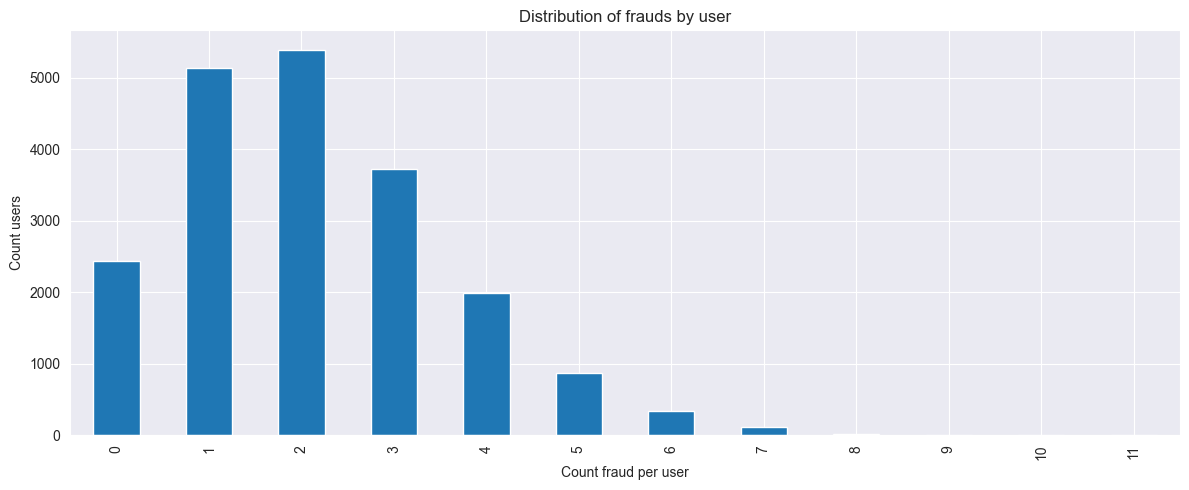

In [55]:
fig, ax = plt.subplots(figsize=(12, 5))

frauds_per_user.value_counts().sort_index().plot(ax=ax, kind='bar')

ax.set_xlabel("Count fraud per user")
ax.set_ylabel("Count users")

ax.set_title("Distribution of frauds by user")

fig.tight_layout()
plt.show()

In [56]:
transactions_per_user = df.groupby('user_id')["is_fraud"].count()

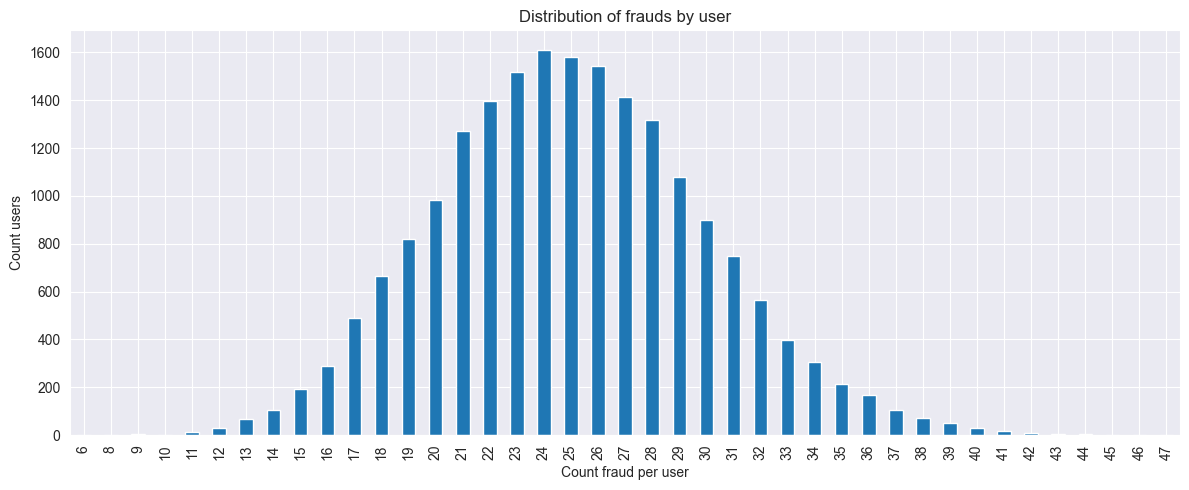

In [57]:
fig, ax = plt.subplots(figsize=(12, 5))

transactions_per_user.value_counts().sort_index().plot(ax=ax, kind='bar')

ax.set_xlabel("Count fraud per user")
ax.set_ylabel("Count users")

ax.set_title("Distribution of frauds by user")

fig.tight_layout()
plt.show()

In [58]:
user_stats = (
	df.groupby('user_id')
	.agg(transactions=('is_fraud', 'count'), frauds=('is_fraud', 'sum'))
)

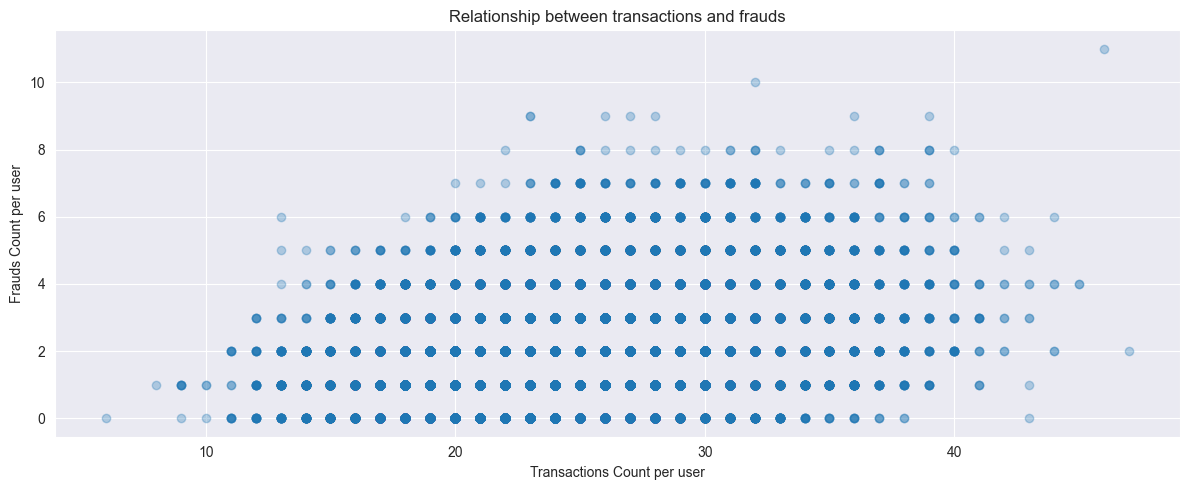

In [59]:
fig, ax = plt.subplots(figsize=(12, 5))

ax.scatter(user_stats['transactions'], user_stats['frauds'], alpha=0.3)

ax.set_xlabel("Transactions Count per user")
ax.set_ylabel("Frauds Count per user")

ax.set_title("Relationship between transactions and frauds")

fig.tight_layout()
plt.show()

In [60]:
corr = user_stats.corr()

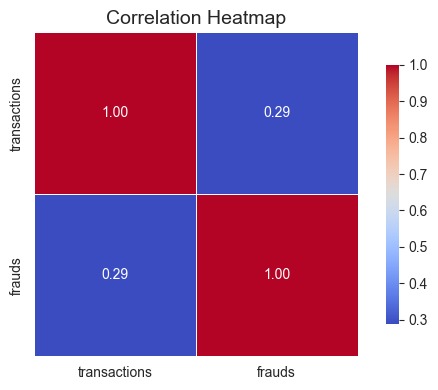

In [61]:
fig, ax = plt.subplots(figsize=(6, 4))

sns.heatmap(corr,
			ax=ax,
			annot=True,
			fmt=".2f",
			square=True,
			linewidths=.5,
			cbar_kws={"shrink": .8},
			cmap="coolwarm"
			)

ax.set_title("Correlation Heatmap", fontsize=14)
plt.tight_layout()
plt.show()

Merchants vs is_fraud

In [62]:
merchants_stats = (
	df.groupby('merchant_id')
	.agg(transactions=('is_fraud', 'count'), frauds=('is_fraud', 'sum'))
)

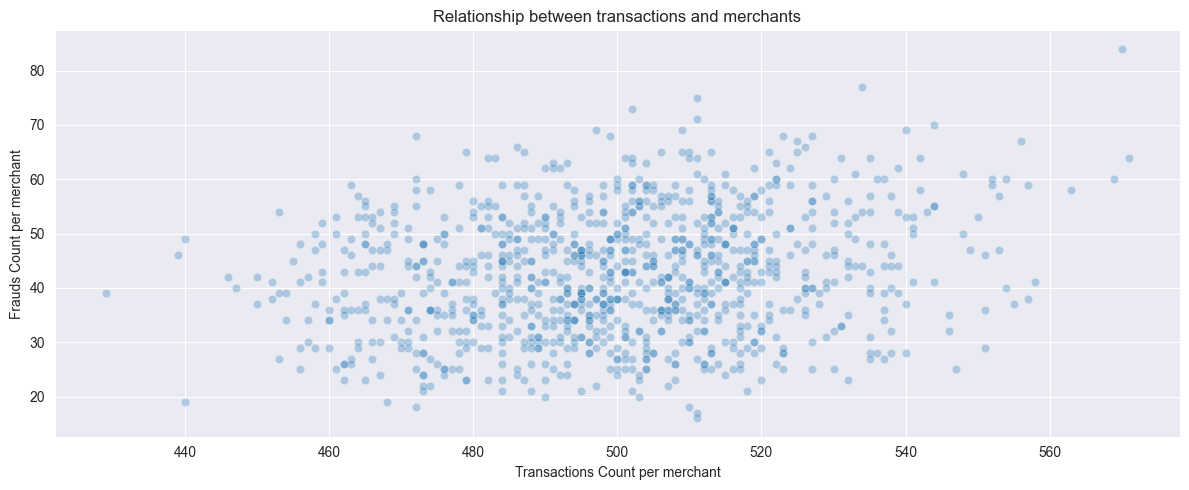

In [63]:
fig, ax = plt.subplots(figsize=(12, 5))

sns.scatterplot(
	data=merchants_stats,
	ax=ax,
	x='transactions',
	y='frauds',
	alpha=0.3,
)

ax.set_title("Relationship between transactions and merchants")
ax.set_xlabel("Transactions Count per merchant")
ax.set_ylabel("Frauds Count per merchant")



fig.tight_layout()
plt.show()

In [64]:
frauds_by_merchant = (
	df.groupby('merchant_id')
	.agg(frauds=('is_fraud', 'sum'))
	.sort_values("frauds", ascending=False)
)

top_merchants = frauds_by_merchant.head(1)

df.loc[df["merchant_id"].isin(top_merchants.index)]

,transaction_id,timestamp,user_id,merchant_id,amount,channel,currency,device,location,payment_method,...,country_user,signup_date,risk_score,category,country_merchant,trust_score,number_of_alerts_last_6_months,avg_transaction_amount,account_age_months,has_fraud_history
154,TX000154,2022-01-16 21:22:00,U01157,M0167,218.82,online,EUR,Web,"{'lat': 67.173166, 'long': 32.067447}",debit_card,...,Belgium,2021-05-17,0.417407,clothing,Austria,0.121984,0,77.46,78,1
1359,TX001359,2022-04-09 07:06:00,U16075,M0167,25.06,mobile,EUR,iOS,"{'lat': 68.06013, 'long': -4.49175}",credit_card,...,Czech Republic,2024-04-30,0.275460,clothing,Austria,0.121984,0,77.46,78,1
1597,TX001597,2023-11-09 17:52:00,U14985,M0167,1.61,online,EUR,Web,"{'lat': 57.376999, 'long': 12.967244}",mobile_payment,...,Finland,2024-10-01,0.306114,clothing,Austria,0.121984,0,77.46,78,1
1623,TX001623,2023-11-08 09:27:00,U09748,M0167,70.88,online,EUR,Android,"{'lat': 40.887693, 'long': 30.813473}",bank_transfer,...,Austria,2023-11-25,0.718623,clothing,Austria,0.121984,0,77.46,78,1
2349,TX002349,2022-02-22 06:19:00,U11293,M0167,10.39,online,EUR,Web,"{'lat': 52.18455, 'long': 29.82342}",mobile_payment,...,Netherlands,2021-07-01,0.401525,clothing,Austria,0.121984,0,77.46,78,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495521,TX495521,2023-04-09 17:09:00,U06498,M0167,24.53,online,EUR,Web,"{'lat': 52.263812, 'long': 32.602421}",bank_transfer,...,France,2023-05-20,0.409616,clothing,Austria,0.121984,0,77.46,78,1
495620,TX495620,2022-02-20 12:00:00,U15511,M0167,123.65,mobile,EUR,iOS,"{'lat': 54.094953, 'long': 38.323477}",debit_card,...,Austria,2021-05-21,0.827028,clothing,Austria,0.121984,0,77.46,78,1
496664,TX496664,2023-12-14 09:10:00,U08663,M0167,23.53,in-store,EUR,Android,"{'lat': 35.354135, 'long': 23.242417}",mobile_payment,...,Spain,2023-09-18,0.230708,clothing,Austria,0.121984,0,77.46,78,1
499416,TX499416,2023-08-22 19:03:00,U11839,M0167,15.08,online,EUR,Web,"{'lat': 39.508264, 'long': 22.168626}",bank_transfer,...,Spain,2023-03-25,0.512608,clothing,Austria,0.121984,0,77.46,78,1


## Category VS is_fraud

             transactions  frauds
category                         
grocery             78246    6582
clothing            75988    6454
electronics         76554    6318
education           70362    6076
travel              68127    5735
restaurants         67157    5683
gaming              63566    5563


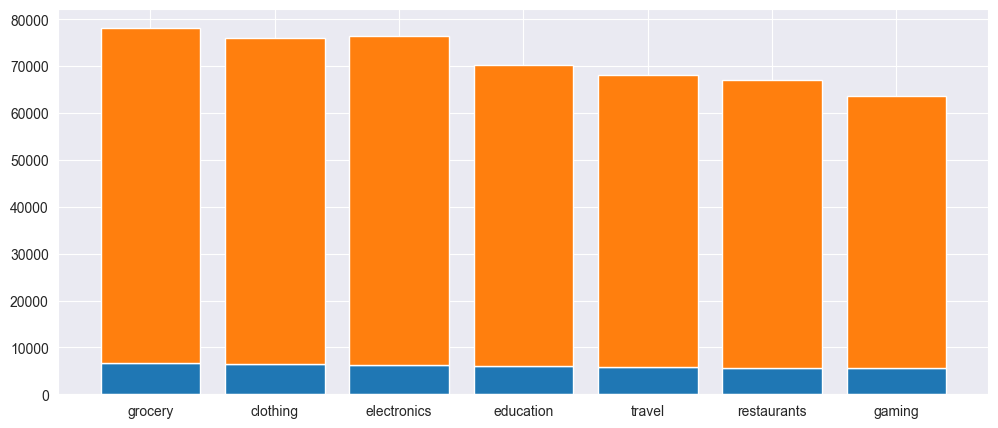

In [65]:
category_stats = (
	df.groupby('category')
	.agg(transactions=('is_fraud', 'count'), frauds=('is_fraud', 'sum'))
	.sort_values("frauds", ascending=False)
)

print(category_stats)

fig, ax = plt.subplots(figsize=(12, 5))

ax.bar(category_stats.index, category_stats['frauds'], label="Frauds")
ax.bar(category_stats.index, category_stats['transactions'] - category_stats['frauds'], bottom=category_stats['frauds'], label="Transactions")

plt.show()

ax.set_title("Distribution of frauds by category")
ax.set_xlabel("Category")
ax.set_ylabel("Count frauds")

fig.tight_layout()
plt.show()


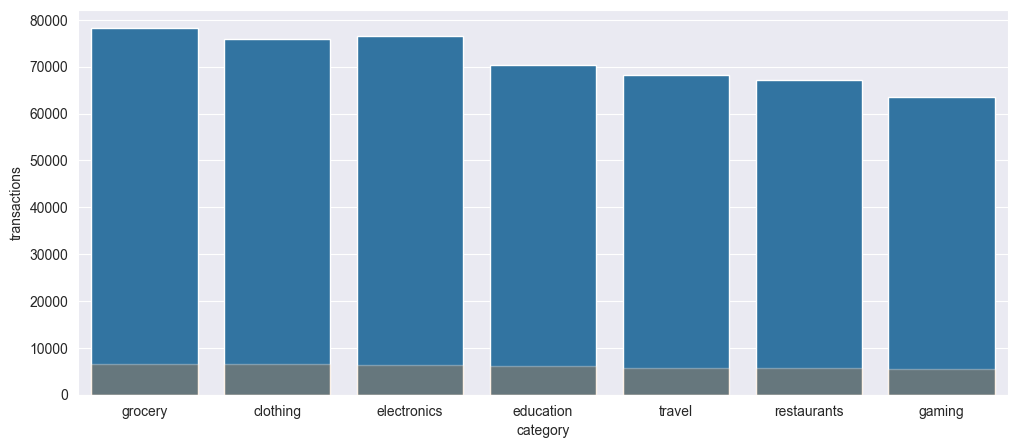

In [66]:
fig, ax = plt.subplots(figsize=(12, 5))

sns.barplot(
    data=category_stats,
    ax=ax,
    y="transactions",
    x="category",
    alpha=1
)
sns.barplot(
    data=category_stats,
    ax=ax,
    y="frauds",
    x="category",
    alpha=0.3
)

plt.show()

ax.set_title("Distribution of frauds by category")
ax.set_xlabel("Category")
ax.set_ylabel("Count frauds")

fig.tight_layout()
plt.show()

## Correlation

In [67]:
df_numeric = df.select_dtypes(include=['number'])

In [68]:
corr = df_numeric.corr()

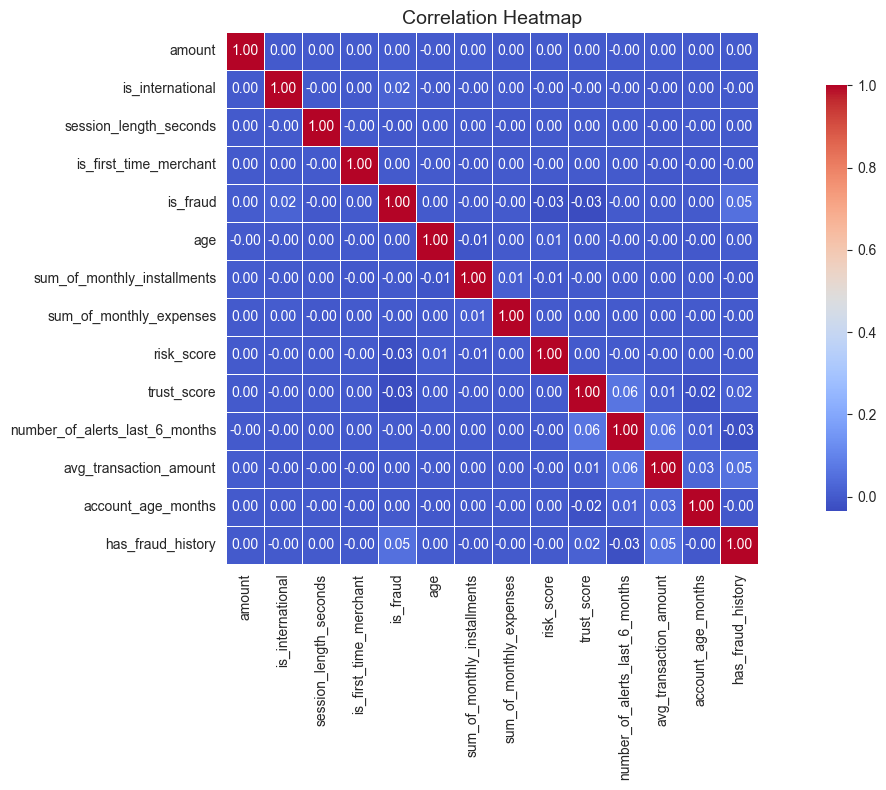

In [69]:
fig, ax = plt.subplots(figsize=(14, 8))

sns.heatmap(corr,
			ax=ax,
			annot=True,
			fmt=".2f",
			square=True,
			linewidths=.5,
			cbar_kws={"shrink": .8},
			cmap="coolwarm"
			)

ax.set_title("Correlation Heatmap", fontsize=14)
plt.tight_layout()
plt.show()

## Categorical data

In [70]:
fraud_by_user_country = (
	df.groupby('country_user')
	.agg(transactions=('is_fraud', 'count'), frauds=('is_fraud', 'sum'))
	.sort_values("frauds", ascending=False)
)



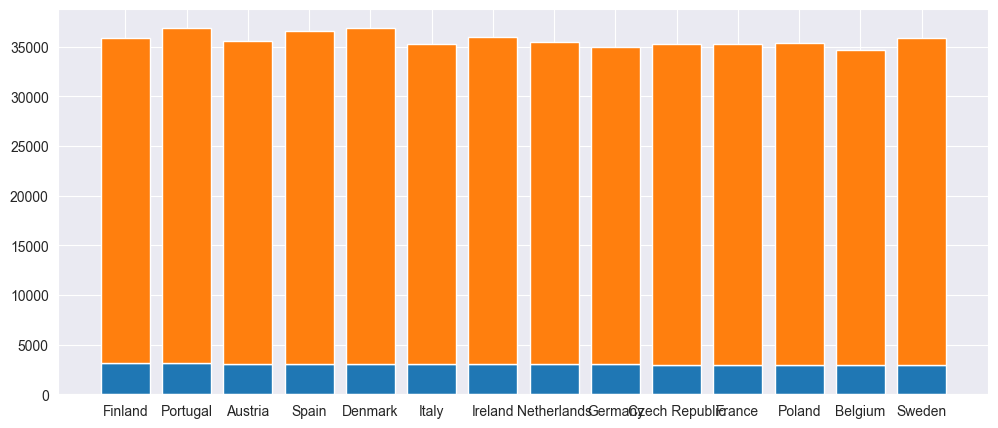

In [71]:
fig, ax = plt.subplots(figsize=(12, 5))

ax.bar(fraud_by_user_country.index, fraud_by_user_country['frauds'], label="Frauds")
ax.bar(fraud_by_user_country.index, fraud_by_user_country['transactions'] - fraud_by_user_country['frauds'], bottom=fraud_by_user_country['frauds'], label="Transactions")

plt.show()

ax.set_title("Distribution of frauds by user Country")
ax.set_xlabel("Country")
ax.set_ylabel("Count frauds")

fig.tight_layout()
plt.show()

In [72]:
import plotly.express as px

In [73]:
fig = px.choropleth(
    df.groupby('country_user')['is_fraud'].sum().reset_index(),
    locations='country_user',
    locationmode='country names',
    color='is_fraud',
    color_continuous_scale='Reds',
    title='Number of frauds by user'
)

fig.show()

Fraud rate international vs local

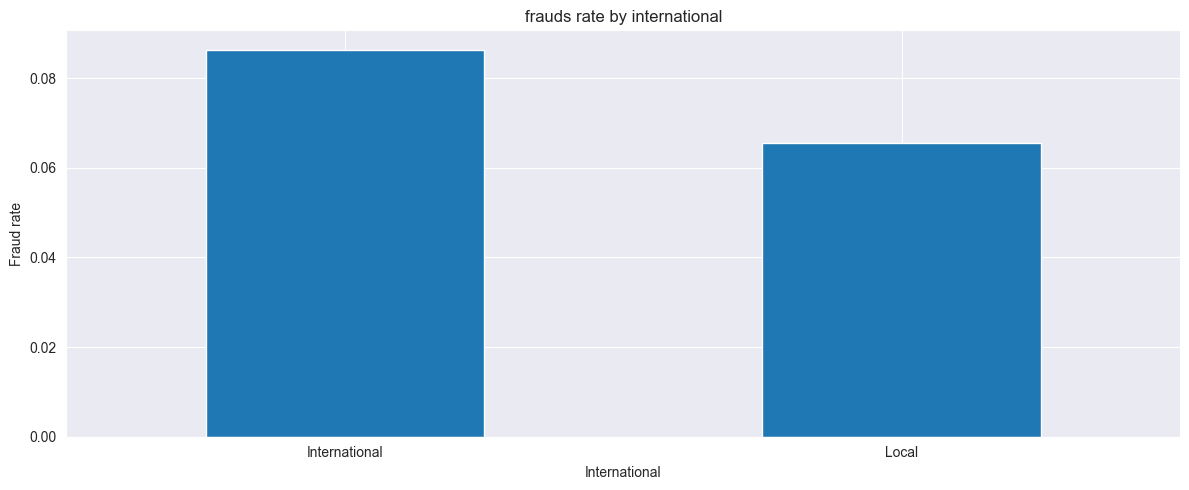

is_international
1    0.086305
0    0.065519
Name: is_fraud, dtype: float64

In [74]:
fraud_rate_by_international = df.groupby('is_international')['is_fraud'].mean().sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(12, 5))
fraud_rate_by_international.plot(kind='bar', ax=ax)

ax.set_title("frauds rate by international")
ax.set_xlabel("International")
ax.set_ylabel("Fraud rate")

ax.set_xticks(ticks=(0,1), labels = ["International","Local"], rotation=0, ha="center")

plt.tight_layout()
plt.show()

fraud_rate_by_international

In [75]:
df.loc[(df['country_user'] == df["country_merchant"]) & (df['is_international'] == 1)]

,transaction_id,timestamp,user_id,merchant_id,amount,channel,currency,device,location,payment_method,...,country_user,signup_date,risk_score,category,country_merchant,trust_score,number_of_alerts_last_6_months,avg_transaction_amount,account_age_months,has_fraud_history


In [76]:
fig = px.choropleth(
	df.groupby('country_merchant')['is_fraud'].sum().reset_index(),
	locations='country_merchant',
	locationmode="country names",
	color="is_fraud",
	color_continuous_scale="Reds",
	title="Number of frauds by merchant"
)

fig.show()

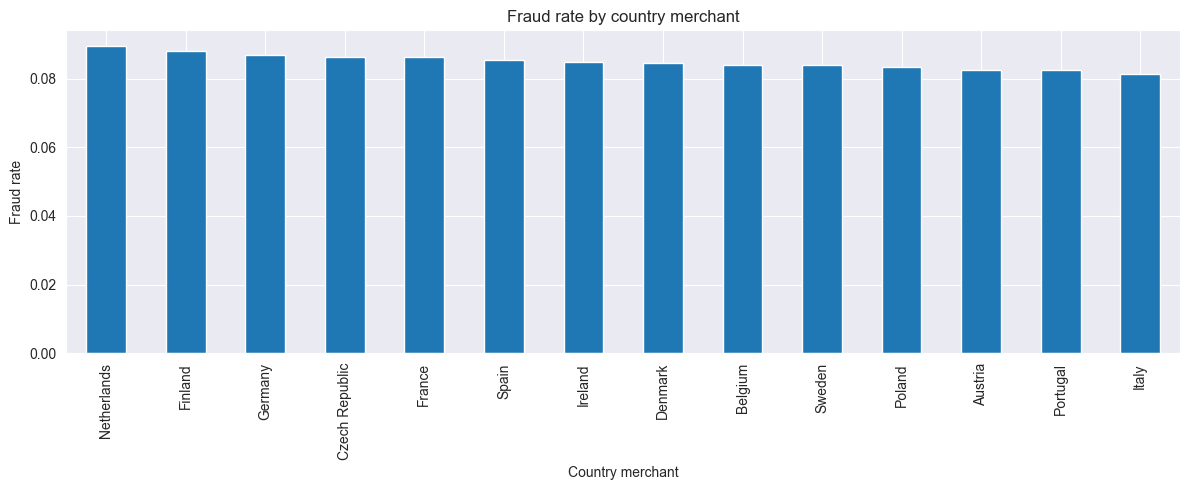

In [77]:
fraud_rate_by_international = df.groupby('country_merchant')['is_fraud'].mean().sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(12, 5))
fraud_rate_by_international.plot(kind='bar', ax=ax)
ax.set_title('Fraud rate by country merchant')
ax.set_xlabel("Country merchant")
ax.set_ylabel('Fraud rate')



fig.tight_layout()
plt.show()

In [78]:
fraud_rate_by_international

country_merchant
Netherlands       0.089521
Finland           0.087988
Germany           0.086811
Czech Republic    0.086302
France            0.086170
Spain             0.085439
Ireland           0.084879
Denmark           0.084404
Belgium           0.084057
Sweden            0.083804
Poland            0.083248
Austria           0.082533
Portugal          0.082511
Italy             0.081288
Name: is_fraud, dtype: float64

In [79]:
df['from_to'] = df['country_user'] + df['country_merchant']

In [80]:
df.loc[df["is_international"] == 1].groupby('from_to')['is_fraud'].mean().sort_values(ascending=False)

from_to
GermanyNetherlands    0.102744
FinlandNetherlands    0.101657
FinlandAustria        0.098967
PolandFrance          0.098208
AustriaSpain          0.097768
                        ...   
SwedenItaly           0.076726
SwedenIreland         0.076639
DenmarkSweden         0.076386
SpainAustria          0.075221
PortugalSweden        0.075127
Name: is_fraud, Length: 182, dtype: float64

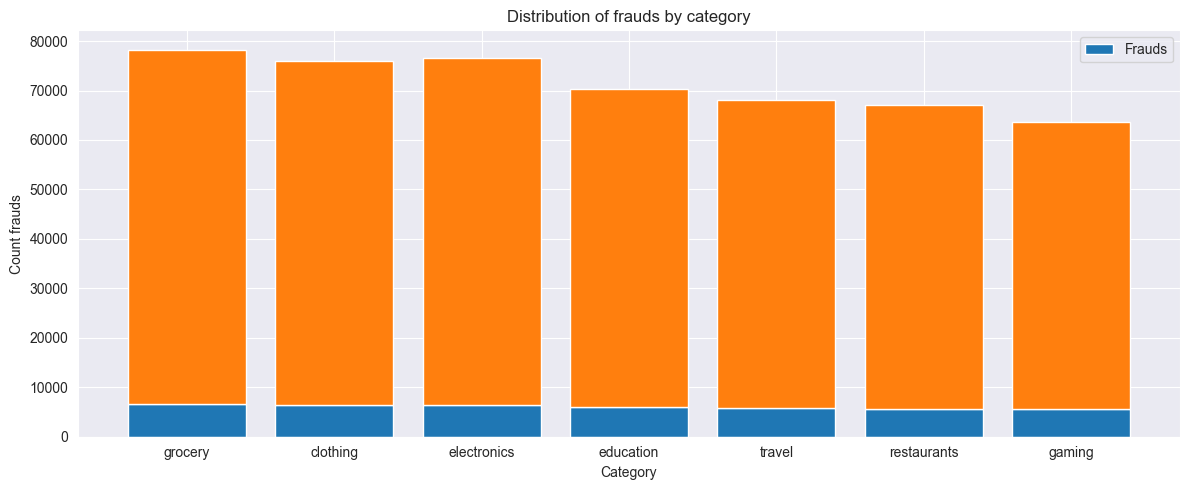

In [81]:
stats = (
    df.groupby('sex')
    .agg(transactions=('is_fraud', 'sum'), frauds=('is_fraud', 'count'))
    .sort_values('frauds', ascending=False)
)



fig, ax = plt.subplots(figsize=(12, 5))

ax.bar(category_stats.index, category_stats['frauds'], label='Frauds')
ax.bar(category_stats.index, category_stats['transactions'] - category_stats['frauds'], bottom=category_stats['frauds'])


ax.set_title("Distribution of frauds by category")
ax.set_xlabel("Category")
ax.set_ylabel("Count frauds")
# ax.set_ylim(0, 1000)
ax.legend()

fig.tight_layout()

# plt.savefig()
plt.show()